<a href="https://colab.research.google.com/github/hopeof-Greatmind/OpenSS/blob/main/mnist_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tensorflow version : 2.15.0
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/50
469/469 [==============================] - 5s 7ms/step - loss: 2.3030 - accuracy: 0.1028 - val_loss: 2.2864 - val_accuracy: 0.1065
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 2.2804 - accuracy: 0.1418 - val_loss: 2.2611 - val_accuracy: 0.1865
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 2.2571 - accuracy: 0.1930 - val_loss: 2.2341 - val_accuracy: 0.3438
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 2.2322 - accuracy: 0.2470 - val_loss: 2.2031 - val_accuracy: 0.4875
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 2.2023 - accuracy: 0.2970 - val_loss: 2.1659 - val_accuracy: 0.5828
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 2.1674 - accuracy: 0.3501 - val_loss: 2.1202 - val_accuracy: 0.6470
Epoch 7/50
469/469 [===========================

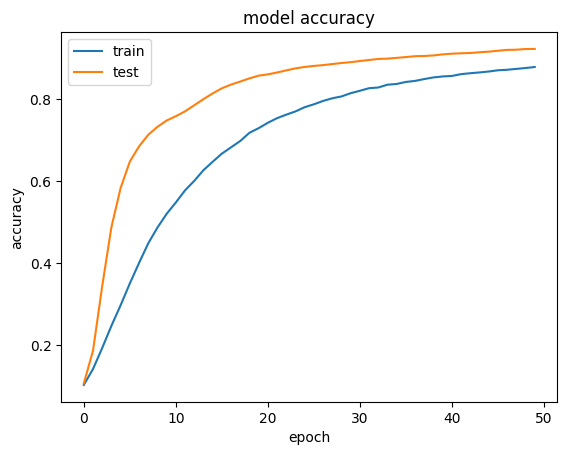

In [10]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''
#-- From Tensorfolw 2.0, keras.somthings --> tensorflow.keras.somethings

from __future__ import print_function

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
#from tensorflow.keras.utils import np_utils
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

print("Tensorflow version :",tf.__version__)

batch_size = 128
num_classes = 10
epochs = 50

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#history_dict = history.history
#print(history_dict.keys())

##-- summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [15]:
mnist_label_file_path =  "/content/gdrive/MyDrive/DeepLearning/cnn/mnist/dataset_test/testlabels/t_labels.txt"
mnist_label = open(mnist_label_file_path, "r")
cnt_correct = 0
for index in range(10):

    #-- read a label
    label = mnist_label.readline()
    print(label)
    #-- predict the input image (digit)
    img = Image.open('/content/gdrive/My Drive/DeepLearning/cnn/mnist/dataset_test/testimgs/' + str(index+1) + '.png').convert("L")
    img = img.resize((28,28))
    im2arr = np.array(img)
    im2arr = im2arr.reshape(1,28,28,1)

      # Predicting the Test set results
      #y_pred = model.predict(im2arr)		#<-- [0,0 .....1. 0.]
      #y_pred = model.predict_classes(im2arr)	#<-- 7 or 4
    predict_x=model.predict(im2arr)
    y_pred=np.argmax(predict_x,axis=1)
    print(y_pred)

    #-- compute the accuracy of the preditcion
    if int(label)==y_pred:
        cnt_correct += 1

#-- Final accuracy
Final_acc = cnt_correct/10
print()
print("Final test accuray: %f" %Final_acc)

7

1/1 [==============================] - 0s 193ms/step
[7]
2

1/1 [==============================] - 0s 17ms/step
[2]
1

1/1 [==============================] - 0s 17ms/step
[1]
0

1/1 [==============================] - 0s 17ms/step
[0]
4

1/1 [==============================] - 0s 16ms/step
[4]
1

1/1 [==============================] - 0s 17ms/step
[1]
4

1/1 [==============================] - 0s 19ms/step
[4]
9

1/1 [==============================] - 0s 17ms/step
[9]
5

1/1 [==============================] - 0s 16ms/step
[2]
9

1/1 [==============================] - 0s 17ms/step
[9]

Final test accuray: 0.900000
